# Alternative fig. 2.10 - showing uncertainty on anthro total

Theme Song: Sometimes<br>
Artist: My Bloody Valentine<br>
Album: Loveless<br>
Released: 1991

Requested by Sunny Simons on Twitter!

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
import matplotlib.patches as mp
from netCDF4 import Dataset
import warnings
from matplotlib.ticker import AutoMinorLocator

In [2]:
# TODO - sort out figure sizing

pl.rcParams['figure.figsize'] = (18/2.54, 9/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
forc_best = pd.read_csv('../data_output/AR6_ERF_1750-2019.csv')
forc_pc05 = pd.read_csv('../data_output/AR6_ERF_1750-2019_pc05.csv')
forc_pc95 = pd.read_csv('../data_output/AR6_ERF_1750-2019_pc95.csv')

In [4]:
species = ['total_anthropogenic']

In [5]:
colors = {
    'co2': '#7f0089',
    'ch4': '#ad5e00',
    'n2o': '#008e83',
    'other_wmghg': '#0070c0',
    'aerosol': '#66665f',
    'o3': '#e5da47',
    'chapter2_other_anthro': '#c0f080',
    'total_anthropogenic' : '#000000',
    'volcanic': '#006000',
    'solar': '#d0a070',
    'total': '#000000'
}

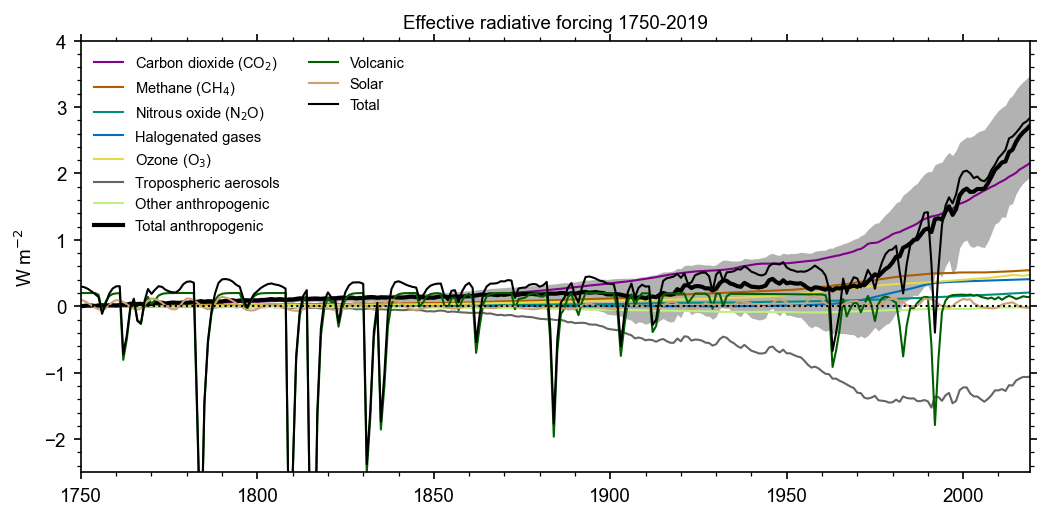

In [6]:
fig, ax = pl.subplots()

year = np.arange(1750, 2020)

for specie in species:
    ax.fill_between(year, forc_pc05[specie], forc_pc95[specie], color=colors[specie], alpha=0.3, lw=0)

ax.plot(year, forc_best['co2'], label='Carbon dioxide (CO$_2$)', color=colors['co2'], lw=1)
ax.plot(year, forc_best['ch4'], label='Methane (CH$_4$)', color=colors['ch4'], lw=1)
ax.plot(year, forc_best['n2o'], label='Nitrous oxide (N$_2$O)', color=colors['n2o'], lw=1)
ax.plot(year, forc_best['other_wmghg'], label='Halogenated gases', color=colors['other_wmghg'], lw=1)
ax.plot(year, forc_best['o3'], label='Ozone (O$_3$)', color=colors['o3'], lw=1)
ax.plot(year, forc_best['aerosol'], label='Tropospheric aerosols', color=colors['aerosol'], lw=1)
ax.plot(year, forc_best['chapter2_other_anthro'], label='Other anthropogenic', color=colors['chapter2_other_anthro'], lw=1)
ax.plot(year, forc_best['total_anthropogenic'], color='k', lw=2, label='Total anthropogenic')
ax.plot(year, forc_best['volcanic'], label='Volcanic', color=colors['volcanic'], lw=1)
ax.plot(year, forc_best['solar'], label='Solar', color=colors['solar'], lw=1)
ax.plot(year, forc_best['total'], color=colors['total'], lw=1, label='Total')
ax.plot(0, 0, color='None', lw=0, label='\n')
ax.plot(0, 0, color='None', lw=0, label='\n')
ax.plot(0, 0, color='None', lw=0, label='\n')
ax.plot(0, 0, color='None', lw=0, label='\n')


ax.axhline(0, color='k', ls=':', lw=1)
ax.set_xlim(1750,2019)
ax.set_ylim(-2.5, 4)

ax.legend(ncol=2, fontsize=7, frameon=False)

ax.set_title('Effective radiative forcing 1750-2019', fontsize=9)
ax.set_ylabel('W m$^{-2}$')

ticklabels = ax.get_xticklabels()
ticklabels = ax.get_yticklabels()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

pl.tight_layout()
pl.savefig('../figures/fig2.10_anthro_uncert.png')
pl.savefig('../figures/fig2.10_anthro_uncert.pdf')